# Assignment Questions:

1.Find number of movies relased in each decade
from 1945, show a line chart to display this.


2. show the distirbution of run time features using an appropriate chart.


3. show barchart for movie genres.


4. show barchart for movie genres for children movies.


5. which of the genres have the highest runtime on the overal datatset and for each age group.

In [129]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
!pip install textblob

from textblob import TextBlob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 262.6 kB/s eta 0:00:03
     - ----------------------------------- 30.7/636.8 kB 262.6 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8

Importing data

In [2]:
df=pd.read_csv('imdb_movies_shows.csv')

In [3]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [4]:
df.tail()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0
5805,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0


In [5]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06


In [6]:
df.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


In [8]:
df['age_certification'].value_counts()

age_certification
TV-MA    841
R        575
TV-14    470
PG-13    440
PG       246
TV-PG    186
G        131
TV-Y7    112
TV-Y     105
TV-G      76
NC-17     14
Name: count, dtype: int64

In [9]:
df['age_certification'].unique()

array(['TV-MA', 'R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [10]:
df['release_year'].unique()

array([1945, 1976, 1975, 1979, 1973, 1969, 1971, 1964, 1980, 1967, 1966,
       1961, 1954, 1958, 1968, 1977, 1972, 1963, 1960, 1956, 1953, 1974,
       1959, 1962, 1978, 1986, 1989, 1984, 1990, 1987, 1983, 1982, 1981,
       1988, 1985, 1995, 2000, 1997, 1994, 1996, 1999, 1998, 1993, 1992,
       1991, 2008, 2010, 2004, 2005, 2003, 2009, 2007, 2006, 2001, 2002,
       2012, 2011, 2014, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2022,
       2021], dtype=int64)

In [11]:
df['genres'].value_counts()

genres
['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: count, Length: 1626, dtype: int64

In [12]:
type(df['genres'])

pandas.core.series.Series

Data Cleaning 
Dropping null values

In [13]:
df= df.dropna(subset=['title'])

In [14]:
df[df['title'].isnull()]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes


In [15]:
df= df.dropna(subset=['imdb_id'])

In [16]:
df[df['imdb_id'].isnull()]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes


Converting genres and production countries to csv

In [17]:
df['genres'] = df['genres'].str.replace('[', '')
df['genres'] = df['genres'].str.replace(']', '')

In [18]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,'comedy',['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,'horror',['US'],NaN,tt0070047,8.1,391942.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",['GB'],4.0,tt0063929,8.8,72895.0


In [19]:
df['production_countries'] = df['production_countries'].str.replace('[', '')
df['production_countries'] = df['production_countries'].str.replace(']', '')

In [20]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",'US',NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",'GB',NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,'comedy','GB',NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,'horror','US',NaN,tt0070047,8.1,391942.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",'GB',4.0,tt0063929,8.8,72895.0


## Question 1.Find number of movies relased in each decade from 1945, show a line chart to display this.

In [21]:
df['decade'] = df['release_year'] // 10 * 10


In [22]:
decade_counts = df.groupby('decade').size()


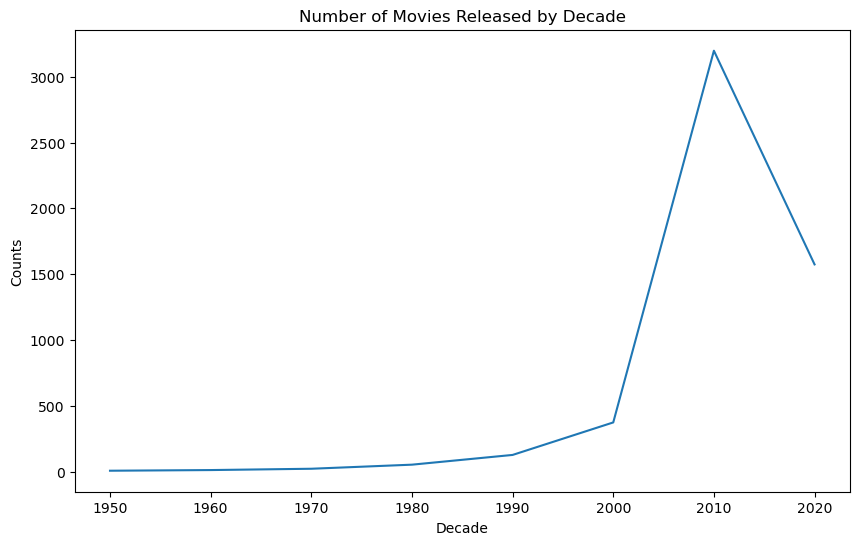

In [23]:
plt.figure(figsize=(10,6))
decade_counts.plot.line()
plt.title('Number of Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Counts')
plt.show()


## Question 2. Show The Distirbution of Run Time Features Using an Appropriate Chart.

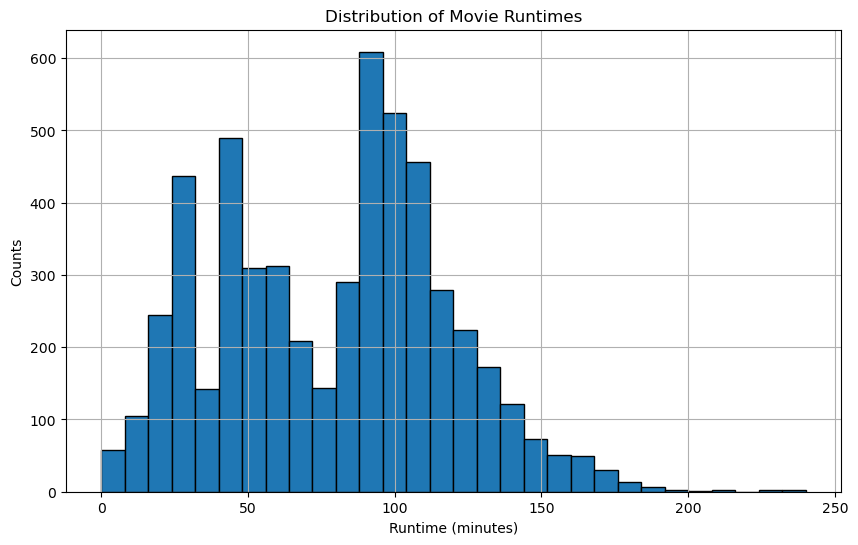

In [24]:
plt.figure(figsize=(10,6))
df['runtime'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Counts')
plt.show()


## Question 3. Show Barchart For Movie Genres.

In [25]:
 df['genres'].unique()

array(["'crime', 'drama'", "'comedy', 'fantasy'", "'comedy'", ...,
       "'crime', 'comedy', 'drama', 'thriller', 'action'",
       "'music', 'romance', 'comedy'", "'family', 'comedy', 'animation'"],
      dtype=object)

In [26]:
df.genres.value_counts

<bound method IndexOpsMixin.value_counts of 1                      'crime', 'drama'
2                   'comedy', 'fantasy'
3                              'comedy'
4                              'horror'
5                  'comedy', 'european'
                     ...               
5800                           'comedy'
5801                 'romance', 'drama'
5803                  'family', 'drama'
5804               'action', 'thriller'
5805    'family', 'comedy', 'animation'
Name: genres, Length: 5361, dtype: object>

In [27]:
df.genres.info()

<class 'pandas.core.series.Series'>
Index: 5361 entries, 1 to 5805
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
5361 non-null   object
dtypes: object(1)
memory usage: 83.8+ KB


In [54]:
# Define a function to map genres to broader categories
def map_to_category(genre):
    if 'action' in genre.lower() or 'crime' in genre.lower() or 'thriller' in genre.lower():
        return 'Crime'
    elif 'comedy' in genre.lower() or 'fantasy' in genre.lower():
        return 'Comedy'
    elif 'drama' in genre.lower():
        return 'Drama'
    elif 'romance' in genre.lower() or 'music' in genre.lower():
        return 'Romance'
    elif 'family' in genre.lower() or 'animation' in genre.lower():
        return 'Family'
    else:
        return 'Other'


In [55]:
# Apply the function to create a new 'category' column
df['category'] = df['genres'].apply(map_to_category)


In [49]:
# Display the result
print(df[['genres', 'category']])


                               genres category
1                    'crime', 'drama'   Action
2                 'comedy', 'fantasy'   Comedy
3                            'comedy'   Comedy
4                            'horror'    Other
5                'comedy', 'european'   Comedy
...                               ...      ...
5800                         'comedy'   Comedy
5801               'romance', 'drama'    Drama
5803                'family', 'drama'    Drama
5804             'action', 'thriller'   Action
5805  'family', 'comedy', 'animation'   Comedy

[5361 rows x 2 columns]


In [68]:
# Count the occurrences of each category
category_counts = df['category'].value_counts()

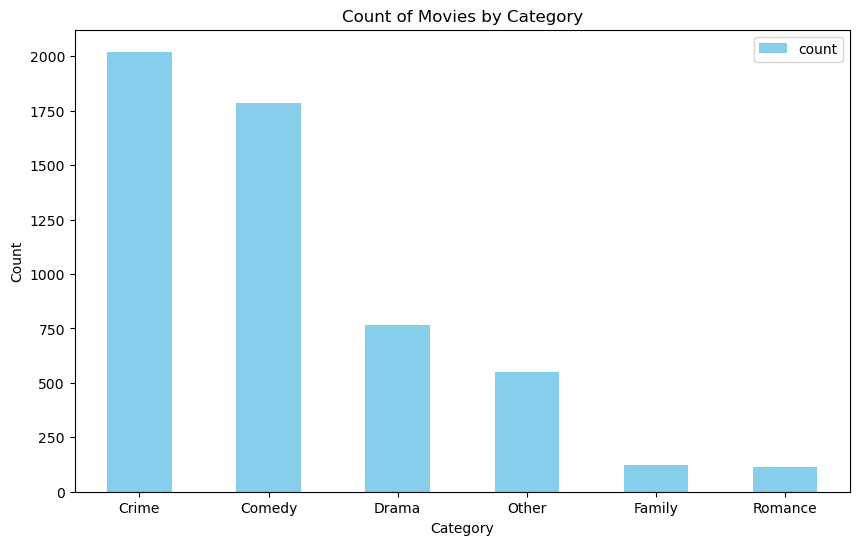

In [57]:
# Plot a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Movies by Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

# Add legend
plt.legend()
plt.show()


## Question 4. show barchart for movie genres for children movies.

In [62]:
genre_counts = children_movies_df['genres'].value_counts()


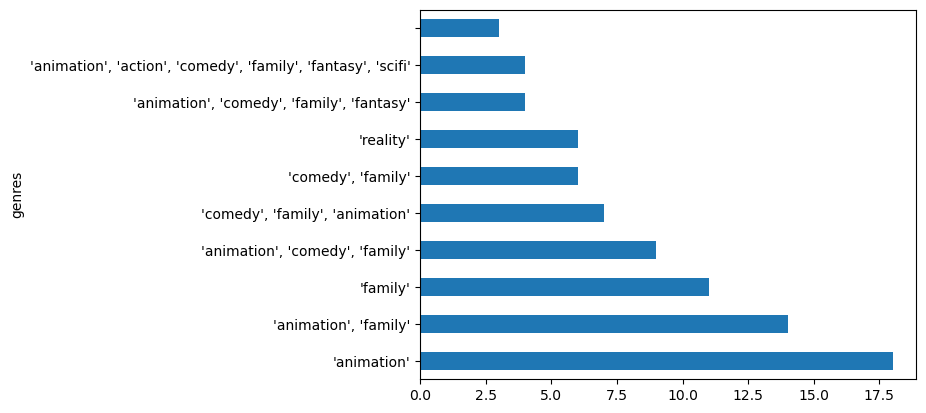

In [63]:
# Children genres in the dataset
children_movies_df['genres'].value_counts().head(10).plot(kind='barh')

plt.show()

## Question 5. Which of The Genres Have The Highest Runtime on The Overal Datatset and For Each Age Group.

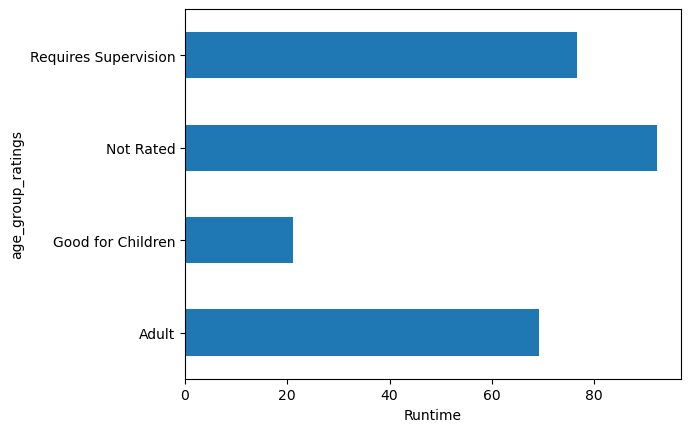

In [70]:
# Average runtime by Ratings
df.groupby('age_group_ratings')['runtime'].mean().plot(kind='barh')
plt.xlabel('Runtime')
plt.show()

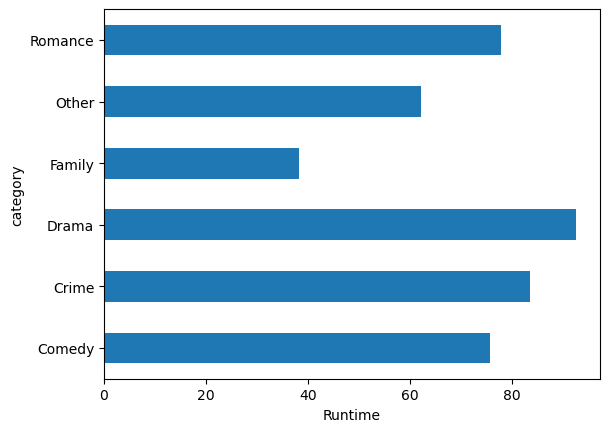

In [71]:
# Average runtime by Category in the whole Dataset
df.groupby('category')['runtime'].mean().plot(kind='barh')
plt.xlabel('Runtime')
plt.show()

# Other 5 Individual Question:

6- Trends of Content Produced on Netflix Anually.

7-Sentiment Analysis

8-

9-

10-

## Question 6. Trends of Content Produced on Netflix Anually.

In [109]:
import plotly.express as px 

df1 = df[['type', 'release_year']]

df1 = df1.rename(columns={"release_year":"Release Year", "type": "Type"})

df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name="Total Counts")



In [110]:
df2

,Release Year,Type,Total Counts
0,1953,MOVIE,1
1,1954,MOVIE,2
2,1956,MOVIE,1
3,1958,MOVIE,1
4,1959,MOVIE,1
...,...,...,...
101,2020,SHOW,256
102,2021,MOVIE,416
103,2021,SHOW,283
104,2022,MOVIE,101


In [120]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y ="Total Counts", color = "Type", 
                title = "Trends of Content Produced on Netflix From The Year 2000 to 2020.")

graph.show()

## Question 7. Sentiment Analysis Base on T

In [132]:
df3 = df[['release_year', 'genres']]

df3 = df3.rename(columns = {"release_year":"Release Year", "genres": "Genre"})

for index, row in df3.iterrows():
    d=row['Genre']
    testimonial = TextBlob(d)
    p = testimonial.sentiment.polarity
    if p==0:
        sent = 'Neutral'
    elif p>0:
        sent = 'Positive'
    else:
        sent = 'Negative'
    df3.loc[[index, 2], 'Sentiment']=sent
df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name='Total Count')

df3 = df3[df3['Release Year']>2005]

bargraph = px.bar(df3, x = "Release Year", y ="Total Count", color="Sentiment", title="Sentiment Analysis On Netflix Datset From 2005 to 2020.")
            

In [133]:
bargraph.show()

In [95]:
children_movies_df.value_counts()

title                           type  release_year  age_certification  runtime  genres                                                         production_countries  seasons  imdb_id     imdb_score  imdb_votes  decade  age_group_ratings
3Below: Tales of Arcadia        SHOW  2018          TV-Y7              22       'comedy', 'scifi', 'action', 'animation', 'family', 'fantasy'  'US'                  2.0      tt7736544   7.7         5927.0      2010    Good for Children    1
Secrets of Summer               SHOW  2022          TV-Y               30       'drama', 'family', 'music'                                     'ES'                  1.0      tt12379170  5.9         110.0       2020    Good for Children    1
Rainbow High                    SHOW  2020          TV-Y               6        'comedy', 'family', 'animation'                                'US'                  3.0      tt13488080  6.4         116.0       2020    Good for Children    1
Rainbow Rangers                 SHOW  201

In [88]:
df['children_movies_df'] = df['release_year'] // 10 * 10

children_decade_counts = df.groupby('children_movies_df').size()


<Figure size 1000x600 with 0 Axes>

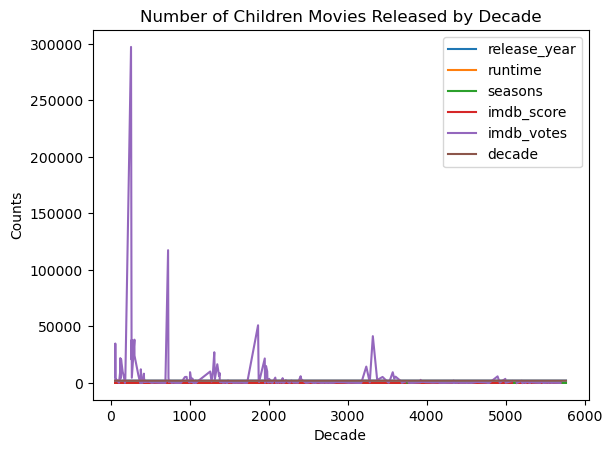

In [89]:
plt.figure(figsize=(10,6))
children_movies_df.plot.line()
plt.title('Number of Children Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Counts')
plt.show()


In [28]:
def age_group(age_cert):
    if age_cert in ['TV-MA', 'R', 'NC-17']:
        return 'Adult'
    elif age_cert in ['PG','TV-14','G','PG-13','TV-PG']:
        return 'Requires Supervision'
    elif age_cert in ['TV-Y','TV-G','TV-Y7']:
        return 'Good for Children'
    else:
        return 'Not Rated'

In [29]:
df['age_group_ratings']= df['age_certification'].apply(age_group)

In [30]:
df['age_group_ratings'].value_counts()

age_group_ratings
Not Rated               2331
Requires Supervision    1392
Adult                   1364
Good for Children        274
Name: count, dtype: int64

In [31]:
children_movies = df['age_group_ratings'] == 'Good for Children'

In [32]:
children_movies_df = df [children_movies]

In [33]:
children_movies_df[children_movies_df.genres.str.contains('animation')]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,decade,age_group_ratings
57,Thomas & Friends,SHOW,1984,TV-Y,10,"'family', 'comedy', 'music', 'action', 'animat...",'GB',24.0,tt0086815,6.5,4948.0,1980,Good for Children
66,Fireman Sam,SHOW,1987,TV-Y,10,"'comedy', 'animation', 'family', 'crime', 'eur...",'GB',13.0,tt0329829,6.1,1759.0,1980,Good for Children
67,Danger Mouse,SHOW,1981,TV-Y,15,"'comedy', 'family', 'scifi', 'animation', 'eur...",'GB',10.0,tt0081848,7.4,3514.0,1980,Good for Children
107,Pokémon,SHOW,1997,TV-Y7,22,"'scifi', 'action', 'comedy', 'fantasy', 'anima...",'JP',24.0,tt0168366,7.6,172.0,1990,Good for Children
121,The Magic School Bus,SHOW,1994,TV-Y,26,"'scifi', 'comedy', 'family', 'fantasy', 'anima...","'US', 'CA'",4.0,tt0108847,7.8,9708.0,1990,Good for Children
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5510,Karma's World,SHOW,2021,TV-Y,11,"'animation', 'comedy', 'family'",'US',2.0,tt13321232,6.2,134.0,2020,Good for Children
5546,We the People,SHOW,2021,TV-Y7,5,"'family', 'music', 'animation', 'comedy'",'US',1.0,tt14770480,3.4,674.0,2020,Good for Children
5586,The New Adventures of Oggy,SHOW,2021,TV-Y,15,"'comedy', 'family', 'action', 'animation'",'US',1.0,tt11194006,6.6,38.0,2020,Good for Children
5604,I Heart Arlo,SHOW,2021,TV-Y7,15,"'comedy', 'family', 'animation'",'US',1.0,tt13573450,7.0,204.0,2020,Good for Children


In [34]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,decade,age_group_ratings
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",'US',NaN,tt0075314,8.3,795222.0,1970,Adult
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",'GB',NaN,tt0071853,8.2,530877.0,1970,Requires Supervision
3,Life of Brian,MOVIE,1979,R,94,'comedy','GB',NaN,tt0079470,8.0,392419.0,1970,Adult
4,The Exorcist,MOVIE,1973,R,133,'horror','US',NaN,tt0070047,8.1,391942.0,1970,Adult
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",'GB',4.0,tt0063929,8.8,72895.0,1960,Requires Supervision


1. Find the number of movies released in each decade from 1945 , show a line chart to display this

In [35]:
df.dtypes

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
decade                    int64
age_group_ratings        object
dtype: object

In [36]:
children_movies = df["age_group_ratings"] == "Good For Children"

In [37]:
children_movies_df = df[df['age_group_ratings'] == 'Good for Children']


In [38]:
children_movies_df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,decade,age_group_ratings
57,Thomas & Friends,SHOW,1984,TV-Y,10,"'family', 'comedy', 'music', 'action', 'animat...",'GB',24.0,tt0086815,6.5,4948.0,1980,Good for Children
60,Saved by the Bell,SHOW,1989,TV-G,23,"'comedy', 'romance', 'family'",'US',5.0,tt0096694,7.1,34854.0,1980,Good for Children
64,Wheel of Fortune,SHOW,1983,TV-G,26,'family','US',39.0,tt0072584,6.7,3126.0,1980,Good for Children
66,Fireman Sam,SHOW,1987,TV-Y,10,"'comedy', 'animation', 'family', 'crime', 'eur...",'GB',13.0,tt0329829,6.1,1759.0,1980,Good for Children
67,Danger Mouse,SHOW,1981,TV-Y,15,"'comedy', 'family', 'scifi', 'animation', 'eur...",'GB',10.0,tt0081848,7.4,3514.0,1980,Good for Children
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Marriage or Mortgage,SHOW,2021,TV-G,40,'reality','US',1.0,tt14037542,5.1,433.0,2020,Good for Children
5586,The New Adventures of Oggy,SHOW,2021,TV-Y,15,"'comedy', 'family', 'action', 'animation'",'US',1.0,tt11194006,6.6,38.0,2020,Good for Children
5604,I Heart Arlo,SHOW,2021,TV-Y7,15,"'comedy', 'family', 'animation'",'US',1.0,tt13573450,7.0,204.0,2020,Good for Children
5695,Team Zenko Go,SHOW,2022,TV-Y,20,"'action', 'animation', 'family'",'US',1.0,tt18274176,7.2,21.0,2020,Good for Children
